In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn import metrics

In [3]:
employee = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')
rows = employee.shape[0]
columns = employee.shape[1]
print (rows, columns)

employee.head()

1470 35


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#look for nan
display(employee.isna().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

Text(0.5, 1.0, 'WorkLifeBalance against JobSatisfaction')

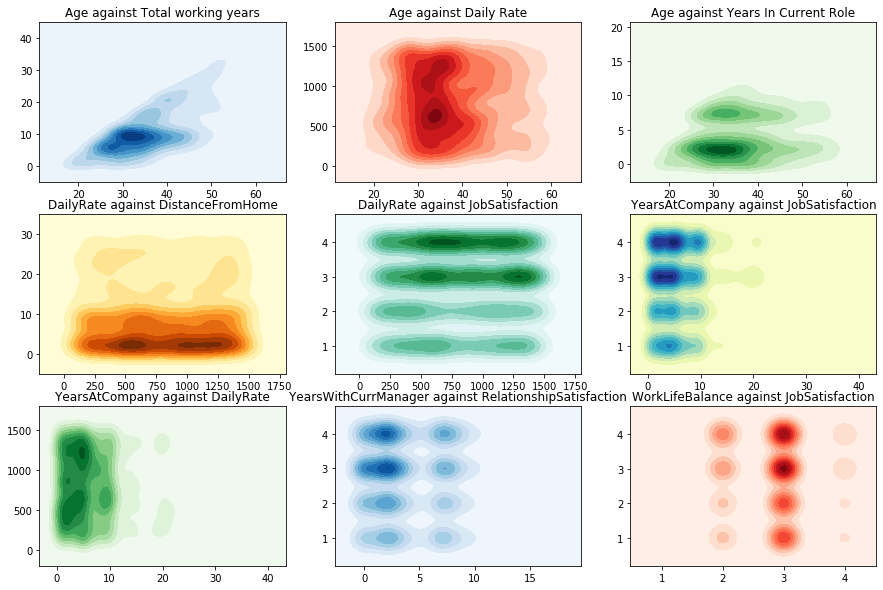

In [5]:
f, axes = plt.subplots(3, 3, figsize=(15,10), sharex=False, sharey=False)

x = employee['Age'].values
y = employee['TotalWorkingYears'].values
sns.kdeplot(x, y, ax=axes[0,0], cmap='Blues', shade=True)
axes[0,0].set_title('Age against Total working years')

x = employee['Age'].values
y = employee['DailyRate'].values
sns.kdeplot(x, y, ax=axes[0,1], cmap='Reds', shade=True)
axes[0,1].set_title('Age against Daily Rate')

x = employee['Age'].values
y = employee['YearsInCurrentRole'].values
sns.kdeplot(x, y, ax=axes[0,2], cmap='Greens', shade=True)
axes[0,2].set_title('Age against Years In Current Role')

x = employee['DailyRate'].values
y = employee['DistanceFromHome'].values
sns.kdeplot(x, y, ax=axes[1,0], cmap='YlOrBr', shade=True)
axes[1,0].set_title('DailyRate against DistanceFromHome')

x = employee['DailyRate'].values
y = employee['JobSatisfaction'].values
sns.kdeplot(x, y, ax=axes[1,1], cmap='BuGn', shade=True)
axes[1,1].set_title('DailyRate against JobSatisfaction')

x = employee['YearsAtCompany'].values
y = employee['JobSatisfaction'].values
sns.kdeplot(x, y, ax=axes[1,2], cmap='YlGnBu', shade=True)
axes[1,2].set_title('YearsAtCompany against JobSatisfaction')

x = employee['YearsAtCompany'].values
y = employee['DailyRate'].values
sns.kdeplot(x, y, ax=axes[2,0], cmap='Greens', shade=True)
axes[2,0].set_title('YearsAtCompany against DailyRate')

x = employee['YearsWithCurrManager'].values
y = employee['RelationshipSatisfaction'].values
sns.kdeplot(x, y, ax=axes[2,1], cmap='Blues', shade=True)
axes[2,1].set_title('YearsWithCurrManager against RelationshipSatisfaction')

x = employee['WorkLifeBalance'].values
y = employee['JobSatisfaction'].values
sns.kdeplot(x, y, ax=axes[2,2], cmap='Reds', shade=True)
axes[2,2].set_title('WorkLifeBalance against JobSatisfaction')

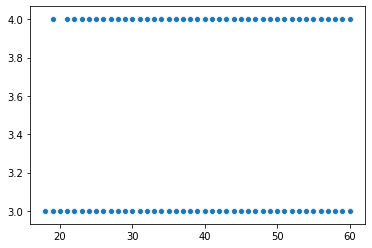

In [6]:
plt.figure()
x = employee['Age'].values
y = employee['PerformanceRating'].values
sns.scatterplot(x, y)

In [7]:
df = pd.DataFrame()
df['EmployeeNumber'] = employee['EmployeeNumber']
df['Age'] = employee['Age']
df['Gender'] = employee['Gender']
df['Education'] = employee['Education']
df['EducationField'] = employee['EducationField']
df['NumCompaniesWorked'] = employee['NumCompaniesWorked']
df['TotalWorkingYears'] = employee['TotalWorkingYears']
df['Department'] = employee['Department']
df['JobLevel'] = employee['JobLevel']
df['JobRole'] = employee['JobRole']

df['Attrition'] = employee['Attrition']
df['PerformanceRating'] = employee['PerformanceRating']
df.EducationField.unique()


array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [8]:
#retrieve categorical and numerical columns
categorical = []
for col, val in df.iteritems():
    if val.dtype == 'object':
        categorical.append(col)

numerical = list(set(df) - set(categorical))

print(categorical)
print(numerical)
#print(type(numerical))

['Gender', 'EducationField', 'Department', 'JobRole', 'Attrition']
['TotalWorkingYears', 'PerformanceRating', 'NumCompaniesWorked', 'Age', 'Education', 'EmployeeNumber', 'JobLevel']


In [9]:
data = [
    go.Heatmap(
        z= df[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=df[numerical].columns.values,
        y=df[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
        #text = True ,
        opacity = 1.0
    )
]

layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

In [10]:
#categorical
df_cat = df[categorical]
# Dropping the target column
df_cat = df_cat.drop(['Attrition'], axis=1) 
# encode categorical data into dummy variables
df_cat = pd.get_dummies(df_cat)

In [11]:
#numerical
df_num = df[numerical]
df_num = df_num.drop(['PerformanceRating'], axis=1)
df_num = df_num.drop(['EmployeeNumber'], axis=1)
df_num.head()

,TotalWorkingYears,NumCompaniesWorked,Age,Education,JobLevel
0,8,8,41,2,2
1,10,1,49,1,2
2,7,6,37,2,1
3,8,1,33,4,1
4,6,9,27,1,1


In [13]:
# training data
df_train = pd.concat([df_num, df_cat], axis=1)
# df_train['new'] = df_train['TotalWorkingYears'] / df_train['Age'] *10
df_train.head()
# axis 0:index, 1:columns, default 0


,TotalWorkingYears,NumCompaniesWorked,Age,Education,JobLevel,Gender_Female,Gender_Male,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,8,8,41,2,2,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,10,1,49,1,2,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,7,6,37,2,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,8,1,33,4,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,6,9,27,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


([<matplotlib.axis.YTick at 0x7f0844e8dfd0>,
 <a list of 8 Text yticklabel objects>)

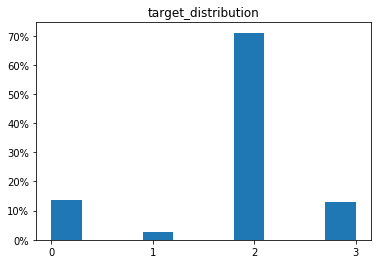

In [17]:
# create target
pd.options.mode.chained_assignment = None  # default='warn'
df_test = df[['Attrition', 'PerformanceRating']]
attrition_map = {'Yes':1, 'No':0}
df_test['Attrition'] = df_test['Attrition'].apply(lambda x: attrition_map[x])

# create multi class
conditions = [
    (df_test['Attrition'] == 1) & (df_test['PerformanceRating'] == 3), #A1P3
    (df_test['Attrition'] == 1) & (df_test['PerformanceRating'] == 4), #A1P4
    (df_test['Attrition'] == 0) & (df_test['PerformanceRating'] == 3), #A0P3
    (df_test['Attrition'] == 0) & (df_test['PerformanceRating'] == 4)] #A0P4
choices = [0, 1, 2, 3]
df_test['target'] = np.select(conditions, choices)
    
df_test = df_test.drop(['Attrition'], axis=1)
df_test = df_test.drop(['PerformanceRating'], axis=1)

# plot data distribution
plt.title('target_distribution')
plt.hist(df_test['target'], weights=np.ones(len(df_test)) / df_test.shape[0])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(np.arange(4), ('0', '1', '2', '3'))
plt.yticks(np.arange(0, 0.8, 0.1))

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train, df_test, test_size = 0.25, random_state = 0)
# # Encode and transform the dataset
# import category_encoders as ce
# one_hot = ce.OneHotEncoder(cols=['Gender', 'Department'], use_cat_names=True).fit(x_train)
# one_hot_dataset = one_hot.transform(x_train)

# target_encode = ce.TargetEncoder(cols=['EducationField', 'JobRole']).fit(one_hot_dataset, y_train)
# x_train = target_encode.transform(one_hot_dataset)
# x_train.head()

# #Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

In [14]:
# deal with imbalance target
from imblearn.over_sampling import SMOTE

oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(x_train, y_train.values.ravel())

In [15]:
# Start Training!
import lightgbm as lgb
d_train = lgb.Dataset(smote_train, label=smote_target)
params = {
    'objective': 'multiclass',
    'boosting': 'gbdt',
    'num_class': 4,
    'num_leaves': 4,
    'max_depth': 5,
    'learning_rate': 0.003,
    'max_bin': 100,
    'boost_from_average': 'false' 
}
model = lgb.train(params, d_train, 10000)

In [16]:
# Prediction
pred = model.predict(x_test)
pred_y = np.argmax(pred, axis=1)
print(pred)

[[0.08235987 0.07401678 0.78071866 0.06290469]
 [0.07190714 0.06018428 0.6557035  0.21220508]
 [0.08460871 0.01455594 0.77425124 0.12658411]
 ...
 [0.09845399 0.02436099 0.61908359 0.25810143]
 [0.05654982 0.00268716 0.77909387 0.16166915]
 [0.2778002  0.01127356 0.54635901 0.16456723]]


In [17]:
# confusion metrics
exp_y = y_test
metrics.multilabel_confusion_matrix(exp_y, pred_y)

array([[[302,  18],
        [ 41,   7]],

       [[351,   7],
        [ 10,   0]],

       [[ 21,  88],
        [ 26, 233]],

       [[308,   9],
        [ 45,   6]]])

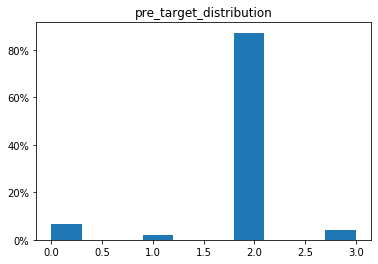

In [18]:
# target distribution
plt.title('pre_target_distribution')
plt.hist(pred_y, weights=np.ones(len(pred_y)) / len(pred_y))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

In [19]:
# Accuracy Score
acc = metrics.accuracy_score(exp_y, pred_y, normalize=True, sample_weight=None)
#kappa = metrics.cohen_kappa_score(exp_y, pred_y, labels=None, weights=None, sample_weight=None)
print("Accuracy = " + str(acc))
#print(kappa)

Accuracy = 0.6684782608695652


In [20]:
# F1 Score
f1_micro = metrics.f1_score(exp_y,pred_y,average='micro')
f1_weighted = metrics.f1_score(exp_y,pred_y,average='weighted')
 
print('f1_micro: {0}'.format(f1_micro))
print('f1_weighted: {0}'.format(f1_weighted))

f1_micro: 0.6684782608695652
f1_weighted: 0.6156829080789618


In [21]:
print(metrics.classification_report(exp_y, pred_y))

              precision    recall  f1-score   support

           0       0.28      0.15      0.19        48
           1       0.00      0.00      0.00        10
           2       0.73      0.90      0.80       259
           3       0.40      0.12      0.18        51

    accuracy                           0.67       368
   macro avg       0.35      0.29      0.29       368
weighted avg       0.60      0.67      0.62       368



In [22]:
# Saving the model as a file
import pickle
filename = 'lgb_model'
pickle.dump(model, open(filename, 'wb'))
filename_data = 'train_column'
pickle.dump(x_test, open(filename_data, 'wb'))

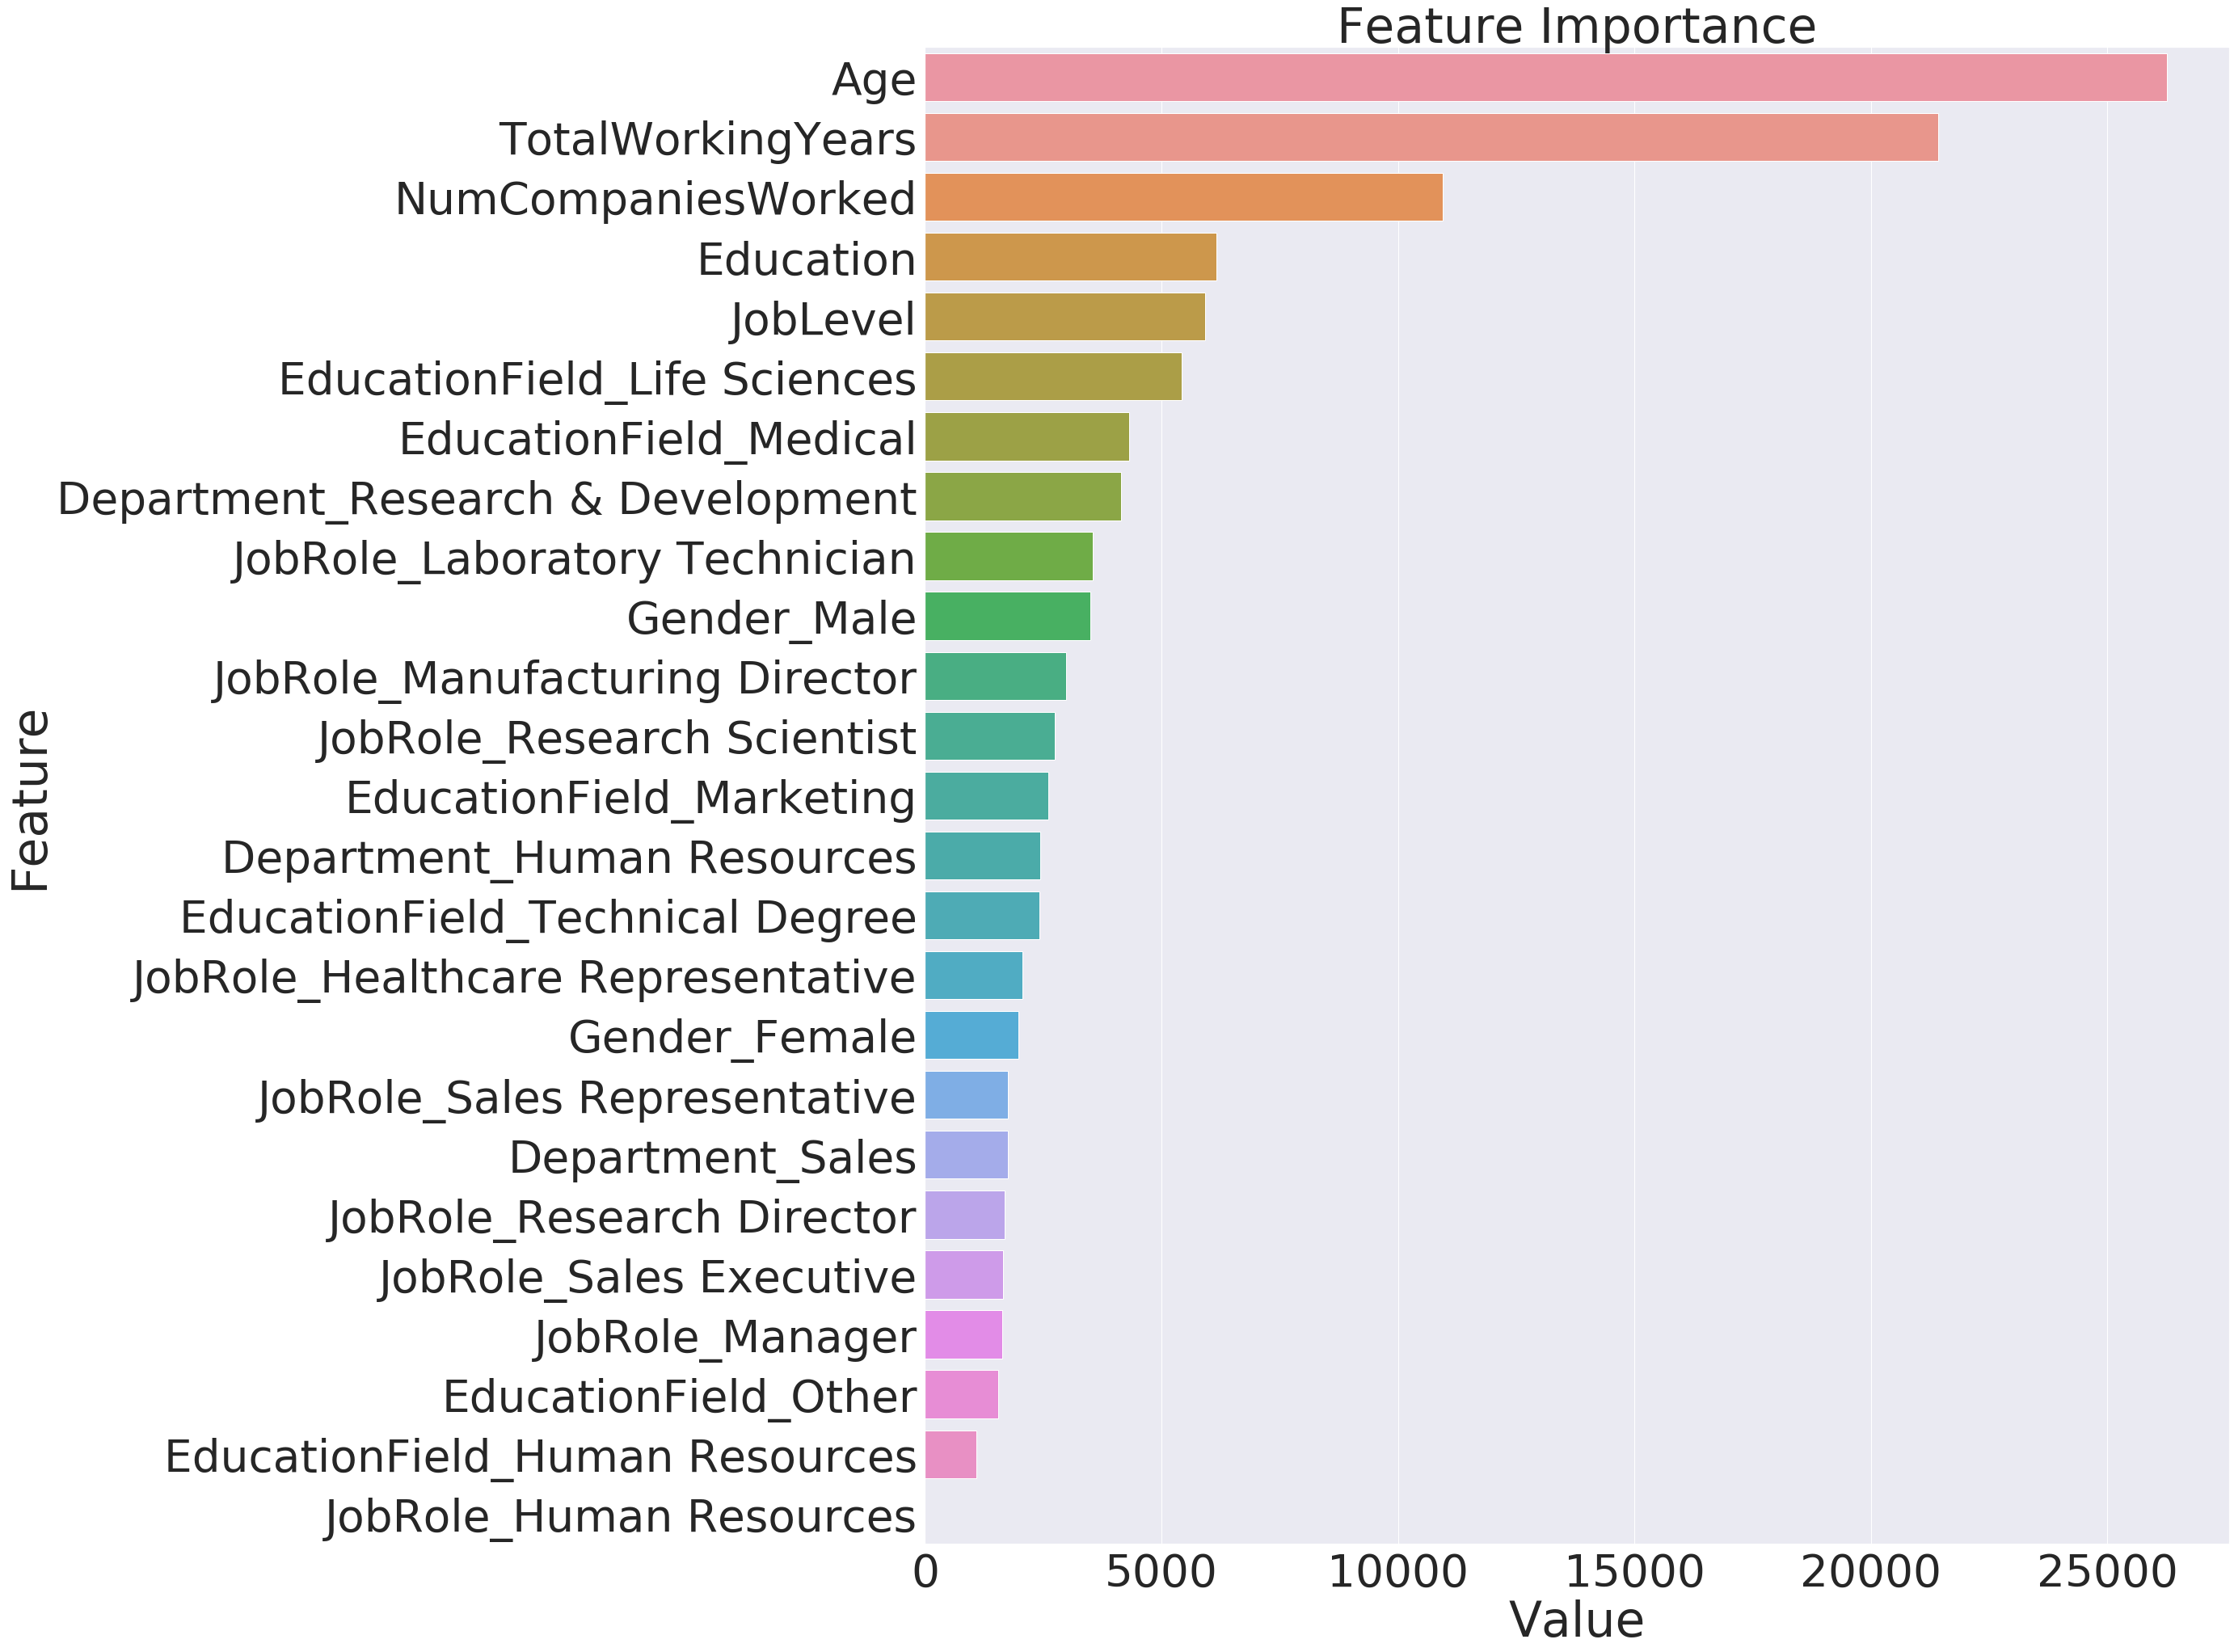

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':df_train.columns})
plt.figure(figsize=(40, 30))
sns.set(font_scale = 5)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))

plt.title('Feature Importance')
plt.tight_layout()
plt.show()